##-Project DATA ANALYSIS
##-DATASET https://lnkd.in/e86UpCMv

#LIBRARIES USED

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

#Loading our Data

In [34]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

#Analyzing About Our Data

In [35]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [36]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [37]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [38]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [39]:
df.shape

(1000, 17)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#Organizing Our Data

In [41]:
concept_hierarchy = {
    'A': 1,'B': 2,'C': 3
}
df['Branch'] = df["Branch"].map(concept_hierarchy)
concept_hierarchy = {
    'Member': 1,'Normal': 2
}
df['Customer type'] = df["Customer type"].map(concept_hierarchy)
concept_hierarchy = {
    'Female': 1,'Male': 2
}
df['Gender'] = df["Gender"].map(concept_hierarchy)
concept_hierarchy = {
    'Food and beverages': 1,'Electronic accessories': 2,
    'Home and lifestyle':3,'Health and beauty':4,'Sports and travel':0,
    'Fashion accessories':5
}
df['Product line'] = df["Product line"].map(concept_hierarchy)
concept_hierarchy = {
    'Ewallet': 1,'Cash': 2,'Credit card':3
}
df['Payment'] = df["Payment"].map(concept_hierarchy)

df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,Yangon,1,1,4,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,3,Naypyitaw,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,Yangon,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,Yangon,1,2,4,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,Yangon,2,2,0,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3


#Cleaning Our Data

In [42]:
#branch and city colume has same work that why we delete any one of these
df.drop('City', inplace=True, axis=1)
df.drop('Invoice ID', inplace=True, axis=1)

In [43]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,1,1,1,4,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,3,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,1,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,1,1,2,4,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,1,2,2,0,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3


In [44]:
df.columns

Index(['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

##CHECKING FOR SKEWNESS OF DATA

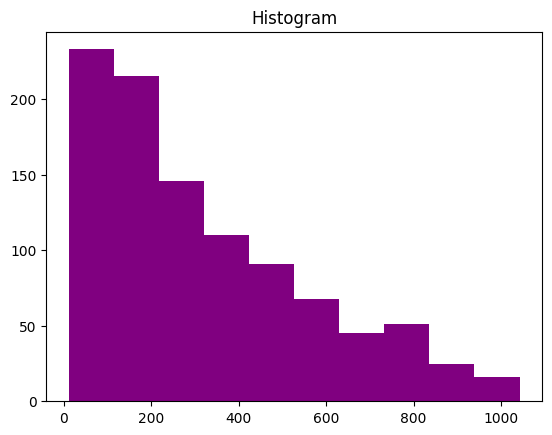

In [45]:
import matplotlib.pyplot as plt
plt.hist(df['Total'],color='purple')
plt.title('Histogram')
plt.show()

removing outliers

In [46]:
def outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    i_q_r = q3 - q1
    outliers = df[(df< (q1 - 1.5 * i_q_r)) | (df > (q3 + 1.5 * i_q_r))]
    return outliers
print('Number of outliers in Branch column: {}'.format(len(outliers(df['Branch']))))
print('Number of outliers in Customer type column: {}'.format(len(outliers(df['Customer type']))))
print('Number of outliers in Product line	column: {}'.format(len(outliers(df['Product line']))))
print('Number of outliers in Unit price	column: {}'.format(len(outliers(df['Unit price']))))
print('Number of outliers in Quantity	column: {}'.format(len(outliers(df['Quantity']))))
print('Number of outliers in Tax 5%	column: {}'.format(len(outliers(df['Tax 5%']))))
print('Number of outliers in 	Total column: {}'.format(len(outliers(df['Total']))))
print('Number of outliers in Payment	column: {}'.format(len(outliers(df['Payment']))))
print('Number of outliers in cogs	column: {}'.format(len(outliers(df['cogs']))))

Number of outliers in Branch column: 0
Number of outliers in Customer type column: 0
Number of outliers in Product line	column: 0
Number of outliers in Unit price	column: 0
Number of outliers in Quantity	column: 0
Number of outliers in Tax 5%	column: 9
Number of outliers in 	Total column: 9
Number of outliers in Payment	column: 0
Number of outliers in cogs	column: 9


In [47]:
for i in outliers(df['Total']):
    df['Total'] = np.where(df['Total'] == i, df['Total'].median(), df['Total'])

for i in outliers(df['Tax 5%']):
    df['Tax 5%'] = np.where(df['Tax 5%'] == i, df['Tax 5%'].median(), df['Tax 5%'])

for i in outliers(df['cogs']):
    df['cogs'] = np.where(df['cogs'] == i, df['cogs'].median(), df['cogs'])

#data normalization

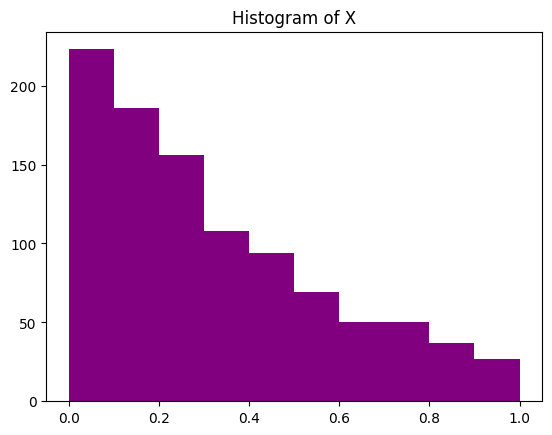

In [48]:
scaler = MinMaxScaler()

# Normalize the data in the dataframe
df['Total'] = scaler.fit_transform(df[['Total']])
plt.hist(df['Total'],color='purple')
plt.title('Histogram of X')
plt.show()

#VARIANCE FILTER

In [49]:
from sklearn.feature_selection import VarianceThreshold
cols_to_include = ['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating']


variances = df.select_dtypes(include=['float64']).var()
print(variances)


threshold = 0.01
variance_filter = VarianceThreshold(threshold)
variance_filter.fit(df[cols_to_include])
selected_cols = df[cols_to_include].columns[variance_filter.get_support(indices=True)]

print(selected_cols)

Unit price                   701.965331
Tax 5%                       127.056906
Total                          0.063259
cogs                       50822.762556
gross margin percentage        0.000000
gross income                 137.096594
Rating                         2.953518
dtype: float64
Index(['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs', 'gross income',
       'Rating'],
      dtype='object')


The 'Unit price', 'Tax 5%', 'Total', 'cogs', and 'gross income' features have relatively high variances compared to the other features, indicating that they have relatively large differences in values across the dataset. This suggests that these features may contain useful information for the prediction task.

#PRINCIPAL ANALYSIS COMPONENT- PCA

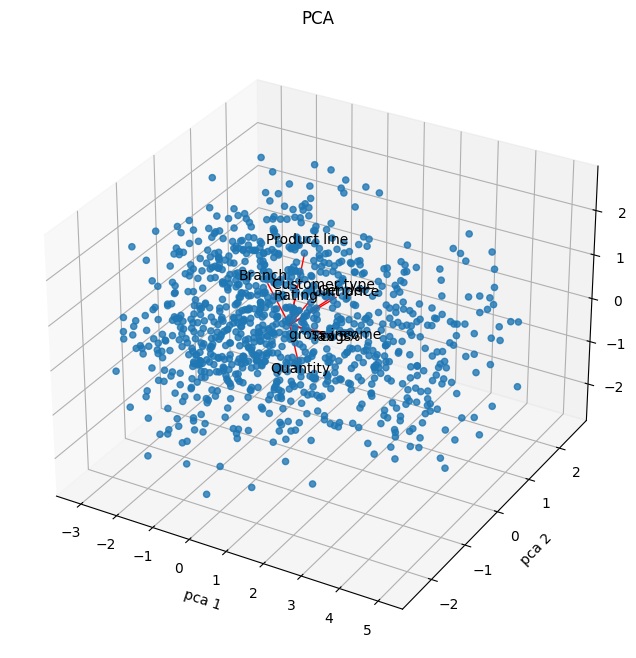

In [50]:
data = df
X_cols = ['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross income', 'Rating']
y_col = 'Total'
X = data[X_cols]
y = data[y_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.8)

ax.set_xlabel('pca 1')
ax.set_ylabel('pca 2')
ax.set_zlabel('pca 3')
ax.set_title('PCA')

n_vars = X.shape[1]
arrow_length = 2
for i in range(n_vars):
    ax.plot([0, pca.components_[0, i]*arrow_length], [0, pca.components_[1, i]*arrow_length], [0, pca.components_[2, i]*arrow_length],
            linewidth=1, color='red')
    ax.text(pca.components_[0, i]*arrow_length*1.2, pca.components_[1, i]*arrow_length*1.2, pca.components_[2, i]*arrow_length*1.2, X_cols[i],
             color='black', ha='center', va='center')

plt.show()

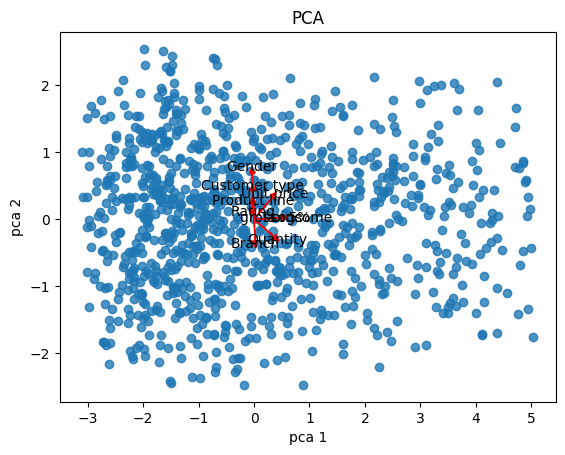

In [51]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)

plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.title('PCA')

n_vars = len(X_cols)
for i in range(n_vars):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.1, head_length=0.1, linewidth=1, color='red')
    plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, X_cols[i],
             color='black', ha='center', va='center')

# Show the plot
plt.show()

#CORRELATION MATRIX

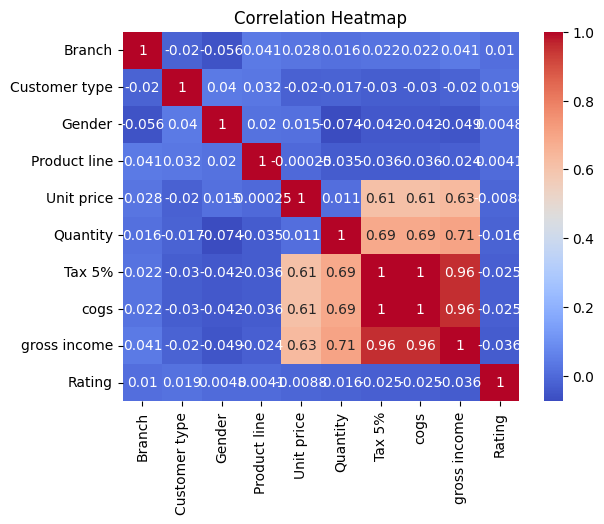

In [52]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Data CLUSTERING

K-Means Clustering

In [53]:
'''
X = df[['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'gross income', 'Rating']]
k = 3

# Create the k-means object
kmeans = KMeans(n_clusters=k)

# Fit the k-means object to the data
kmeans.fit(X)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Print the number of data points in each cluster
print(df['Cluster'].value_counts())
'''

"\nX = df[['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'gross income', 'Rating']]\nk = 3\n\n# Create the k-means object\nkmeans = KMeans(n_clusters=k)\n\n# Fit the k-means object to the data\nkmeans.fit(X)\n\n# Add the cluster labels to the dataframe\ndf['Cluster'] = kmeans.labels_\n\n# Print the number of data points in each cluster\nprint(df['Cluster'].value_counts())\n"

In [54]:
'''
X_cols = ['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'cogs',  'gross income', 'Rating']
y_col = 'Total'

k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(df[X_cols])

df['Cluster'] = kmeans.labels_

print(df['Cluster'].value_counts())

for col in X_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df[col], df[y_col], c=df['Cluster'])
    ax.set_xlabel(col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{col} vs {y_col}')
    plt.show()
'''

"\nX_cols = ['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'cogs',  'gross income', 'Rating']\ny_col = 'Total'\n\nk = 3\nkmeans = KMeans(n_clusters=k)\nkmeans.fit(df[X_cols])\n\ndf['Cluster'] = kmeans.labels_\n\nprint(df['Cluster'].value_counts())\n\nfor col in X_cols:\n    fig = plt.figure()\n    ax = fig.add_subplot(111)\n    ax.scatter(df[col], df[y_col], c=df['Cluster'])\n    ax.set_xlabel(col)\n    ax.set_ylabel(y_col)\n    ax.set_title(f'{col} vs {y_col}')\n    plt.show()\n"

#DATA SPLITTING

In [55]:
X = df[['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross income', 'Rating']]
y = df['Total']
X.head

<bound method NDFrame.head of      Branch  Customer type  Gender  Product line  Unit price  Quantity  \
0         1              1       1             4       74.69         7   
1         3              2       1             2       15.28         5   
2         1              2       2             3       46.33         7   
3         1              1       2             4       58.22         8   
4         1              2       2             0       86.31         7   
..      ...            ...     ...           ...         ...       ...   
995       3              2       2             4       40.35         1   
996       2              2       1             3       97.38        10   
997       1              1       2             1       31.84         1   
998       1              2       2             3       65.82         1   
999       1              1       1             5       88.34         7   

        Tax 5%        cogs  gross income  Rating  
0    26.141500  522.830000    

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
object = MinMaxScaler()
X_train = object.fit_transform(X_train)
X_test = object.fit_transform(X_test)

In [58]:
X_train

array([[0.        , 0.        , 1.        , ..., 0.69776756, 0.63635624,
        0.05      ],
       [0.5       , 0.        , 1.        , ..., 0.07117914, 0.06491458,
        0.23333333],
       [0.        , 1.        , 1.        , ..., 0.4182946 , 0.38148001,
        0.25      ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.00214207, 0.00195354,
        0.7       ],
       [0.        , 0.        , 0.        , ..., 0.23104214, 0.21070785,
        0.7       ],
       [0.5       , 0.        , 0.        , ..., 0.1431504 , 0.13055157,
        0.15      ]])

In [59]:
X_test

array([[0.5       , 1.        , 1.        , ..., 0.17848141, 0.16565711,
        0.43333333],
       [0.        , 0.        , 0.        , ..., 0.46402692, 0.43068552,
        0.16666667],
       [0.        , 0.        , 1.        , ..., 0.25177784, 0.23368702,
        0.08333333],
       ...,
       [0.        , 1.        , 1.        , ..., 0.00225043, 0.00208873,
        0.71666667],
       [0.5       , 0.        , 1.        , ..., 0.35961833, 0.33377893,
        0.18333333],
       [0.5       , 0.        , 0.        , ..., 0.3936898 , 0.36540229,
        0.13333333]])

In [60]:
print('Traning data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)

Traning data shape: (800, 10)
Testing data shape: (200, 10)


In [61]:
np.mean(X_train),np.std(X_train)

(0.4448857231109363, 0.36187344656891246)

In [62]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
variance = pca.explained_variance_ratio_
print(pca)

PCA(n_components=2)


#KNN - SUPERVISED CLUSTERING ALGORITHM

In [73]:
k = 5
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

# Predict the values for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error (MSE):", mse)

Mean squared error (MSE): 8.430829189668717e-06


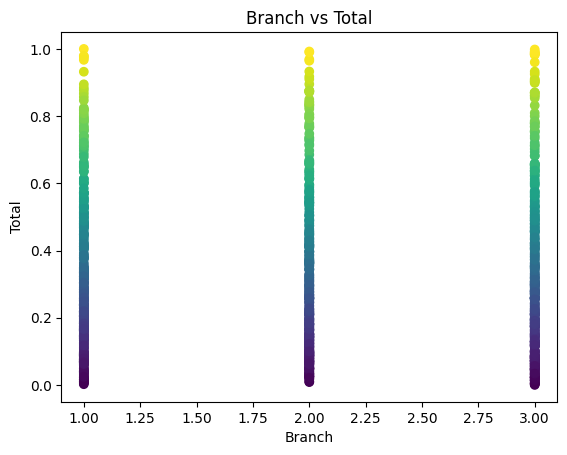

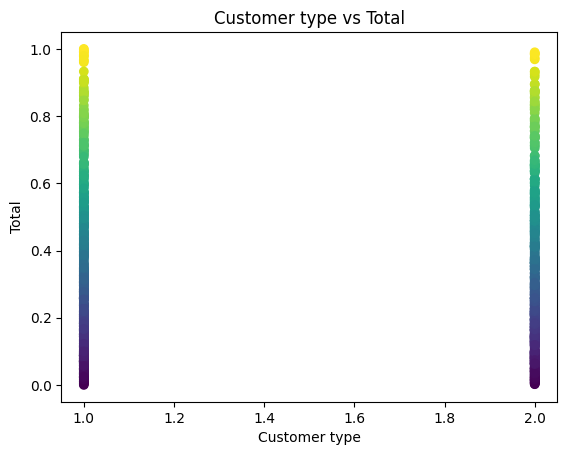

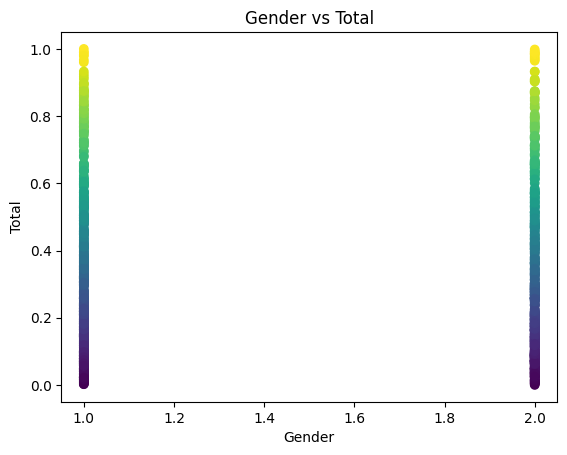

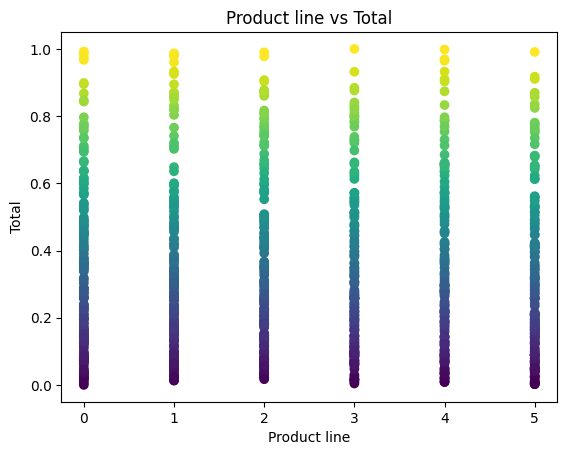

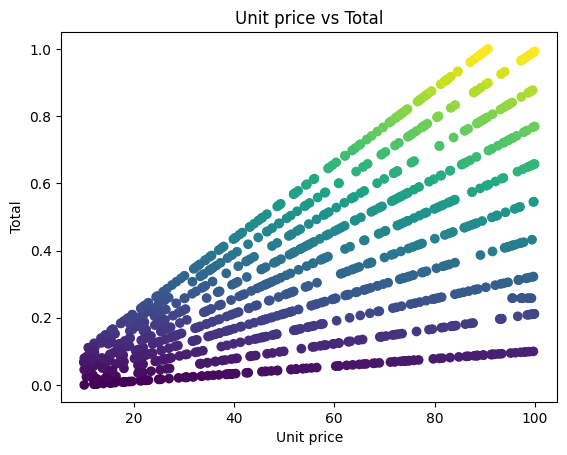

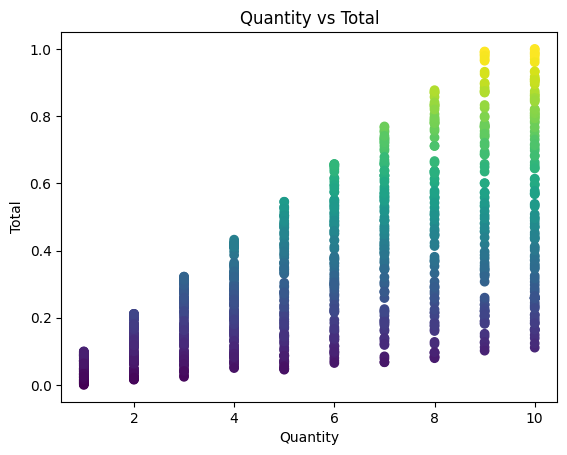

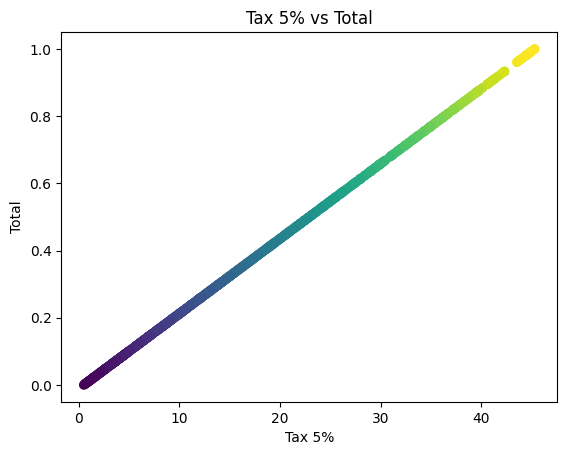

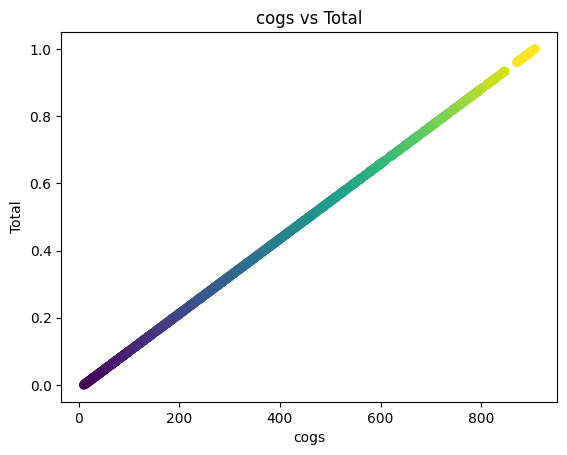

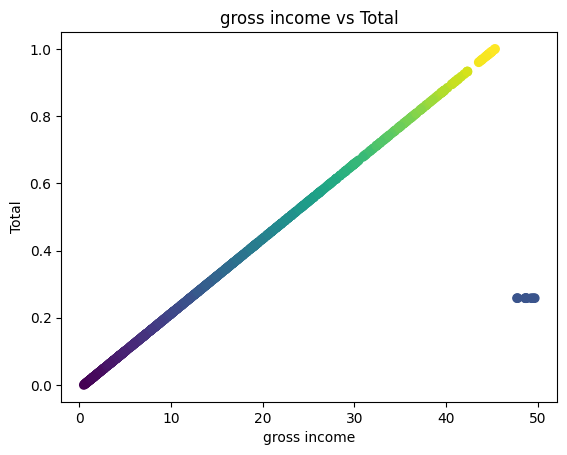

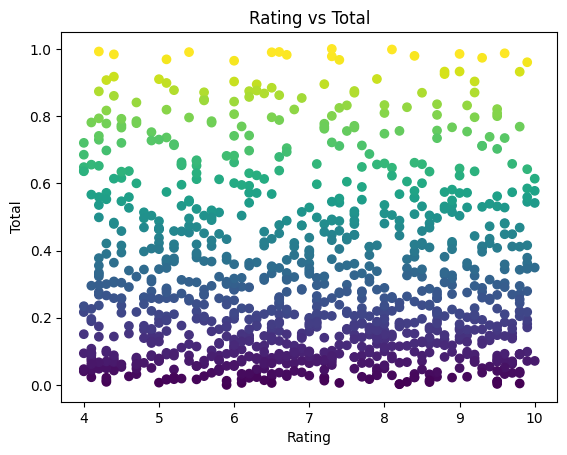

In [75]:
# Predict the values for the entire dataset
df['Cluster'] = model.predict(df[X_cols])
# Create scatter plots for each feature against the 'Total' column
for col in X_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df[col], df[y_col], c=df['Cluster'])
    ax.set_xlabel(col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{col} vs {y_col}')
    plt.show()

#GRADIENT DECENT MODELS

Batch Gradient Descent

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

Mean squared error: 0.00
R-squared: 1.00


A mean squared error (MSE) of 0.00 and an R-squared (R2) of 1.00 indicate that the regression model has a perfect fit to the data. In other words, the model is able to predict the values of the dependent variable with zero error, and all of the variance in the dependent variable is explained by the independent variables in the model.

Stochastic Gradient Descent

In [65]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

#mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 3.855553060204409e+27
R-squared Score: -5.2492072663065355e+28


#REGRESSION\PREDICTION MODEL

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print("R-squared value:", r_squared)

R-squared value: 1.0


#REGULARIZATION - AVOIDING OVER\UNDER FITTING

#CHECKING GOODNESS OF FIT

In [67]:
from sklearn.linear_model import Ridge, Lasso
#Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print('Ridge Regression RMSE:', rmse_ridge)

# Lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('Lasso Regression RMSE:', rmse_lasso)

Ridge Regression RMSE: 8.181416393832647e-09
Lasso Regression RMSE: 0.005029265353320952


An R-squared value of 1.0 means that the model fits the data perfectly, i.e., the model explains all the variability in the target variable using the input features. However, a perfect fit may indicate overfitting, where the model has learned the noise or random fluctuations in the data rather than the underlying patterns.

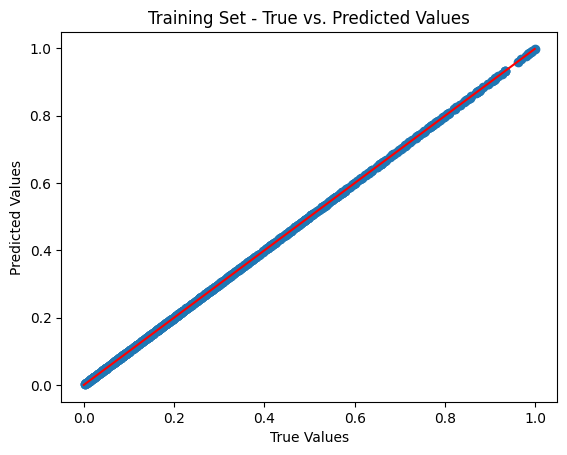

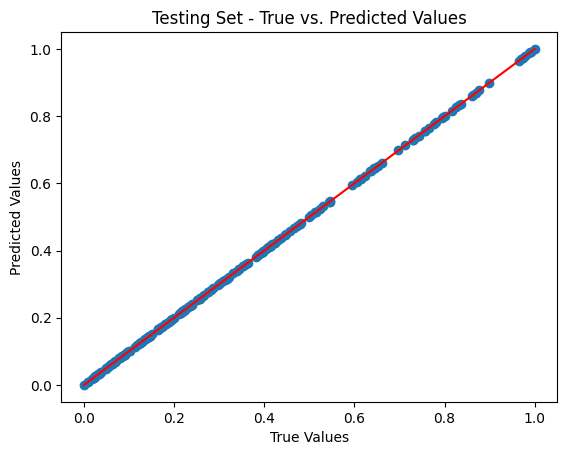

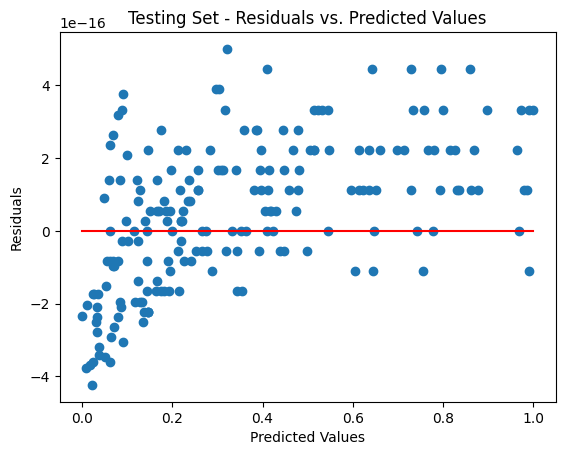

In [72]:
# predicted values against the true values for the training set
plt.scatter(y_train, y_train)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training Set - True vs. Predicted Values')
plt.plot([0, np.max(y_train)], [0, np.max(y_train)], color='red')
plt.show()

# predicted values against the true values for the testing set
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Testing Set - True vs. Predicted Values')
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red')
plt.show()

# residuals against the predicted values for the testing set
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Testing Set - Residuals vs. Predicted Values')
plt.plot([np.min(y_pred), np.max(y_pred)], [0, 0], color='red')
plt.show()

In this example, model is the trained linear regression model, X_train, y_train, X_test, and y_test are the training and testing data, and y_train_pred and y_test_pred are the predicted values for the training and testing data, respectively.

The first two plots show the predicted values against the true values for the training and testing sets, respectively. The red line represents the line of perfect prediction, where the true values and predicted values are the same. Ideally, the points should be close to the red line, indicating that the model is making accurate predictions.

The third plot shows the residuals (i.e., the differences between the true values and predicted values) against the predicted values for the testing set. The red line represents zero residuals, where the predicted values and true values are the same. Ideally, the residuals should be randomly distributed around the zero line, indicating that the model is making consistent and unbiased predictions.

----------THAS IT THANKYOU!----------